In [1]:
%load_ext autoreload
%autoreload 2

# Sentiments analysis of Libyan stream media twitter accounts

Generally, the objective of sentiment analysis (opinion mining) is to analyse people’s sentiments, opinions, attitudes, emotions and appraisals regarding entities such as services, products, issues, events,
individuals, organizations and topics, in this research I try to analysis several Libyan news media accounts on twitter social media platform. The objective of the study is to get closer insight to thier media message, and how this message conrubute to the on-going civil war.
     
 by **Dr. Mansour Essgaer**
 
 **References**:
 
  * Liu, B. (2012). Sentiment analysis and opinion mining. Synthesis lectures on human language technologies, 5(1), 1-167.
  * Aldayel, H. K., & Azmi, A. M. (2016). Arabic tweets sentiment analysis–a hybrid scheme. Journal of Information Science, 42(6), 782-797.
  * Al-Moslmi, T., Albared, M., Al-Shabi, A., Omar, N., & Abdullah, S. (2018). Arabic senti-lexicon: Constructing publicly available language resources for Arabic sentiment analysis. Journal of information science, 44(3), 345-362.
  * Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media.

  
  * Moreover, credit goes to many resources on github such as:
      Alice Zhao
  ***

## Research methodology

This research is follow the **six major** steps shown below:

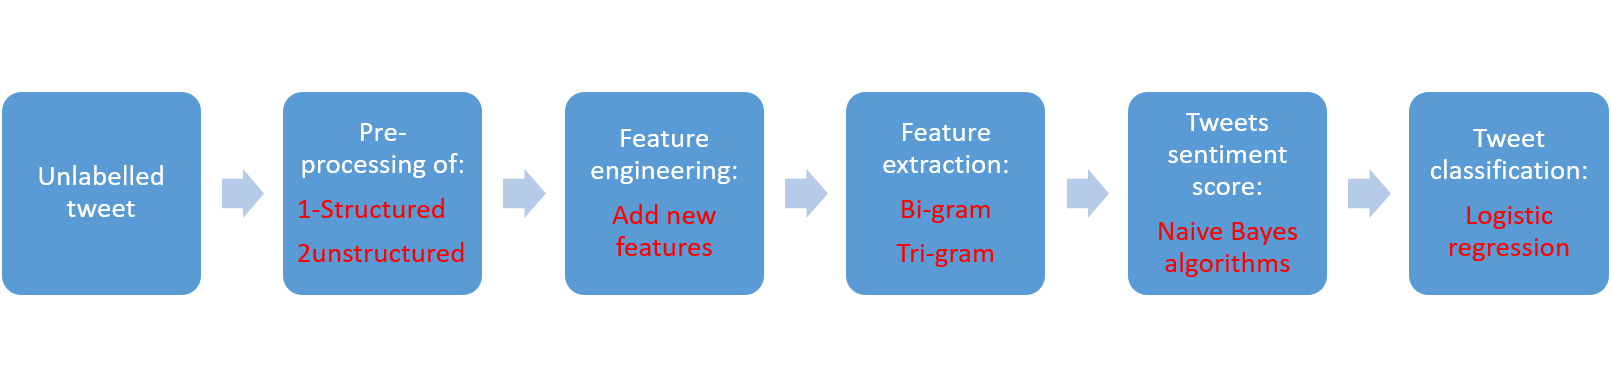

## Import the necessary library 

In [2]:
import numpy as np
import pandas as pd

import analysis_utils
from scipy.stats import norm
from textblob import TextBlob
import re
import string

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 1. Dataset load, first insight

The data had been collected from **Twitter** form different **Libyan news agencies accounts**, with intention to measure the contribution of these stream media in the Libyan conflict either positively or negatively, all the account is scraped on **30-5-2020**, example of the twitter accounts which had been scraped:

1. Lyobserver
2. FebruaryChannel
3. EanLibya
4. ObservatoryLY
5. libyaalhadathtv
6. libyaalahrartv
7. asdaalibya1
8. alwasatnewsly
9. akhbarlibya24
10. afrigatenewsly


The following code is to load the **Json data file**, the second code is to **lower case** and **remove the space** in the columns name


In [3]:
tweet_data = pd.read_json('Lyobserver.json', encoding='utf-8')

In [5]:
#tweet_data.rename(columns=lambda x: x.lower().replace(' ', '_'))

The data shape (rows, columns)

In [7]:
tweet_data.shape

(3206, 31)



#### The data is consist of mixeture of **quantitative and qualitative** type, in this study I am intersted in **non structed data type** (text data)

#### Moreover, the data has alot of null value which need to be preprocessed

In [8]:
tweet_data.head()

,usert_id,user_name,user_location,user_description,user_timezone,user_account_created_at,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,...,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,location,place,coordinates,geo,lang,source_device,mined_at
0,2445145434,Lyobserver,Tripoli,The Libya Observer is a key source for compreh...,NaN,2014-04-15 08:59:11,56301,103,566,0,...,NaN,NaN,None,NaN,NaN,NaN,NaN,en,Twitter Web App,2020-05-30 06:43:03.133359
1,2445145434,Lyobserver,Tripoli,The Libya Observer is a key source for compreh...,NaN,2014-04-15 08:59:11,56301,103,566,0,...,NaN,NaN,None,NaN,NaN,NaN,NaN,en,Twitter Web App,2020-05-30 06:43:03.133359
2,2445145434,Lyobserver,Tripoli,The Libya Observer is a key source for compreh...,NaN,2014-04-15 08:59:11,56301,103,566,0,...,NaN,NaN,None,NaN,NaN,NaN,NaN,en,TweetDeck,2020-05-30 06:43:03.133359
3,2445145434,Lyobserver,Tripoli,The Libya Observer is a key source for compreh...,NaN,2014-04-15 08:59:11,56301,103,566,0,...,NaN,NaN,None,NaN,NaN,NaN,NaN,en,Twitter Web App,2020-05-30 06:43:03.133359
4,2445145434,Lyobserver,Tripoli,The Libya Observer is a key source for compreh...,NaN,2014-04-15 08:59:11,56301,103,566,0,...,NaN,NaN,None,NaN,NaN,NaN,NaN,in,TweetDeck,2020-05-30 06:43:03.133359


### Information of each columns

In [9]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 31 columns):
usert_id                   3206 non-null int64
user_name                  3206 non-null object
user_location              3206 non-null object
user_description           3206 non-null object
user_timezone              0 non-null float64
user_account_created_at    3206 non-null datetime64[ns]
user_followers_count       3206 non-null int64
user_friends_count         3206 non-null int64
user_listed_count          3206 non-null int64
user_favourites_count      3206 non-null int64
user_statuses_count        3206 non-null int64
tweet_id                   3206 non-null int64
tweet_text                 3206 non-null object
tweet_text_range           3206 non-null int64
tweet_created_at           3206 non-null datetime64[ns]
tweet_favourite_count      3206 non-null int64
tweet_retweets_count       3206 non-null int64
tweet_favorited            3206 non-null bool
tweet_retweeted            

### Unique value of each columns

In [10]:
tweet_data.nunique()

usert_id                      1
user_name                     1
user_location                 1
user_description              1
user_timezone                 0
user_account_created_at       1
user_followers_count          1
user_friends_count            1
user_listed_count             1
user_favourites_count         1
user_statuses_count           1
tweet_id                   3206
tweet_text                 3185
tweet_text_range            248
tweet_created_at           3206
tweet_favourite_count       110
tweet_retweets_count         59
tweet_favorited               1
tweet_retweeted               1
tweet_hashtags              237
is_quote_status               2
in_reply_to_status_id        12
in_reply_to_user_id           3
in_reply_to_screen_name       3
location                      0
place                         0
coordinates                   0
geo                           0
lang                         19
source_device                 5
mined_at                    204
dtype: i

## Seperate user static information for later use (optional)

In [11]:
account_info_columns = ['usert_id','user_name','user_location','user_description','user_timezone'
                          ,'user_account_created_at','user_followers_count','user_friends_count'
                          ,'user_listed_count','user_favourites_count','user_statuses_count']
account_info = tweet_data[account_info_columns]

In [12]:
tweet_data.drop(account_info_columns, axis=1, inplace=True)

In [13]:
account_info.nunique()

usert_id                   1
user_name                  1
user_location              1
user_description           1
user_timezone              0
user_account_created_at    1
user_followers_count       1
user_friends_count         1
user_listed_count          1
user_favourites_count      1
user_statuses_count        1
dtype: int64

In [14]:
account_info.drop(['user_timezone'], axis=1, inplace=True)

C:\Users\manso\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
account_details = account_info.iloc[0]

In [17]:
account_details

usert_id                                                          2445145434
user_name                                                         Lyobserver
user_location                                                        Tripoli
user_description           The Libya Observer is a key source for compreh...
user_account_created_at                                  2014-04-15 08:59:11
user_followers_count                                                   56301
user_friends_count                                                       103
user_listed_count                                                        566
user_favourites_count                                                      0
user_statuses_count                                                    38690
Name: 0, dtype: object

# 2. Numerical data exploration and cleaning


### List all the remeaning columns

In [19]:
list(tweet_data.columns)

['tweet_id',
 'tweet_text',
 'tweet_text_range',
 'tweet_created_at',
 'tweet_favourite_count',
 'tweet_retweets_count',
 'tweet_favorited',
 'tweet_retweeted',
 'tweet_hashtags',
 'is_quote_status',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'location',
 'place',
 'coordinates',
 'geo',
 'lang',
 'source_device',
 'mined_at']

### List just the numerical  columns

In [20]:
numerical_feature_columns = list(tweet_data._get_numeric_data().columns)
numerical_feature_columns

['tweet_id',
 'tweet_text_range',
 'tweet_favourite_count',
 'tweet_retweets_count',
 'tweet_favorited',
 'tweet_retweeted',
 'is_quote_status',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'location',
 'place',
 'coordinates',
 'geo']

### List the textual and categorical columns

In [21]:
textual_categorical_feature_columns = list(set(tweet_data.columns) - set(tweet_data._get_numeric_data().columns))
textual_categorical_feature_columns

['source_device',
 'mined_at',
 'tweet_created_at',
 'in_reply_to_screen_name',
 'tweet_text',
 'lang',
 'tweet_hashtags']

### Heatmap to show the null value for all columns

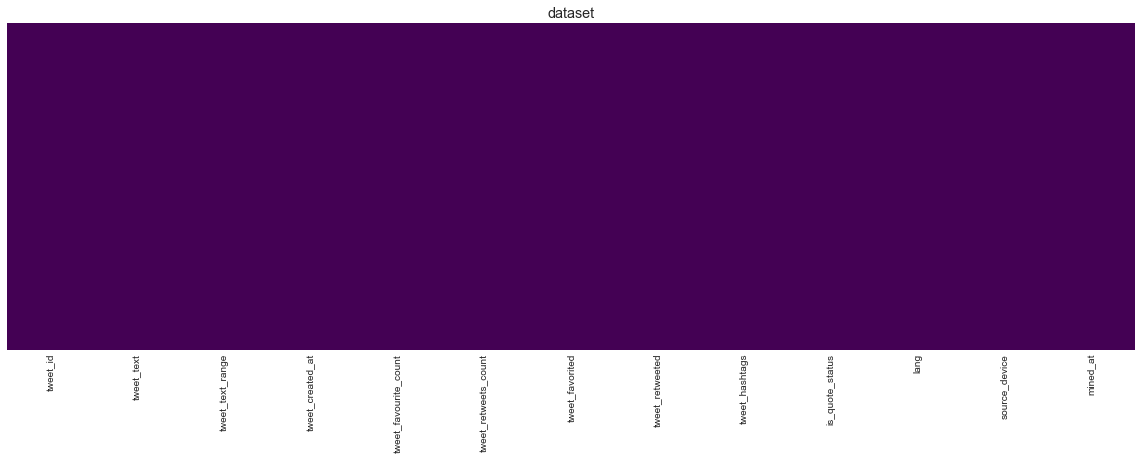

tweet_id : % 0 With 0 missing values
tweet_text : % 0 With 0 missing values
tweet_text_range : % 0 With 0 missing values
tweet_created_at : % 0 With 0 missing values
tweet_favourite_count : % 0 With 0 missing values
tweet_retweets_count : % 0 With 0 missing values
tweet_favorited : % 0 With 0 missing values
tweet_retweeted : % 0 With 0 missing values
tweet_hashtags : % 0 With 0 missing values
is_quote_status : % 0 With 0 missing values
lang : % 0 With 0 missing values
source_device : % 0 With 0 missing values
mined_at : % 0 With 0 missing values


In [26]:
analysis_utils.missing_heat_map(tweet_data)

### Explore the mostly null values columns for preprocessing 
If the null value is more than 95% of the columns then the columns is has no useful information

In [23]:
null_value_columns = []
for col in tweet_data.columns:
    if int((tweet_data[col].isnull().sum()/len(tweet_data[col]))*100) > 95:
        null_value_columns.append (col)
        print(col,': %',int((tweet_data[col].isnull().sum()/len(tweet_data[col]))*100),\
            'With {} missing values'.format((tweet_data[col].isnull().sum())))
null_value_columns        

in_reply_to_status_id : % 99 With 3193 missing values
in_reply_to_user_id : % 99 With 3192 missing values
in_reply_to_screen_name : % 99 With 3192 missing values
location : % 100 With 3206 missing values
place : % 100 With 3206 missing values
coordinates : % 100 With 3206 missing values
geo : % 100 With 3206 missing values


['in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'location',
 'place',
 'coordinates',
 'geo']

In [24]:
# null_value_tweets= tweet_data[null_value_columns].isnull().sum().reset_index(name='counts')
# plt.figure(figsize=(14,5))
# ax = sns.barplot(x=null_value_tweets['index'], y=null_value_tweets['counts'])
# ax.set_ylim(0,3500)
# for i, v in null_value_tweets.reset_index().iterrows():
#     ax.text(i , v.counts + 80 , 'NULL=' + str(v.counts)+' of '+ str(len(tweet_data)), color='black', ha="center")
# ax.set(xlabel='Columns with null values', ylabel='Tweet count')    
# plt.xticks(rotation=45)

### Drop mostly null values columns

In [25]:
tweet_data.drop(null_value_columns, axis=1, inplace=True)

### Explore the non-unique values columns for preprocessing
If the columns has few distinct values (Under 5), then the columns is has no much useful information

In [27]:
non_unique_value_columns = []
for col in tweet_data.columns:
    if tweet_data[col].nunique() < 5:
        non_unique_value_columns.append (col)
        print(col,': with {} non-unique values'.format((tweet_data[col].nunique())))
non_unique_value_columns

tweet_favorited : with 1 non-unique values
tweet_retweeted : with 1 non-unique values
is_quote_status : with 2 non-unique values


['tweet_favorited', 'tweet_retweeted', 'is_quote_status']

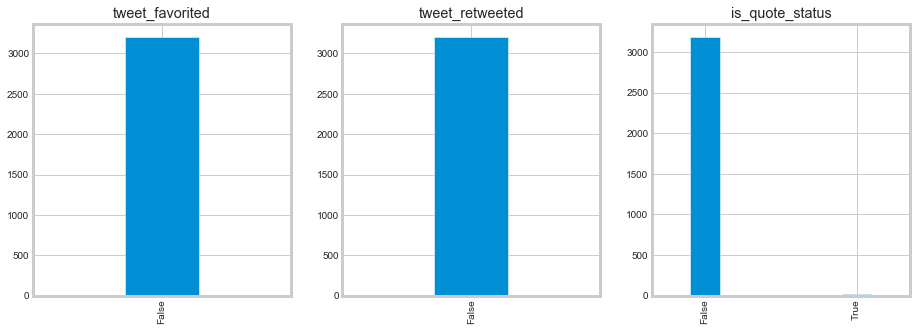

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=len(non_unique_value_columns), figsize=(14,5))
for i in range(len(non_unique_value_columns)):
    tweet_data[non_unique_value_columns[i]].value_counts().plot(ax=axes[i],kind='bar', width=0.2)
    axes[i].set_title(label=non_unique_value_columns[i])

In [29]:
tweet_data.drop(non_unique_value_columns, axis=1, inplace=True)

### Drop none related columns if exist

In [30]:
tweet_data.head()

,tweet_id,tweet_text,tweet_text_range,tweet_created_at,tweet_favourite_count,tweet_retweets_count,tweet_hashtags,lang,source_device,mined_at
0,1266450750022070272,Latest update of the #Coronavirus in #Libya. 1...,71,2020-05-29 19:26:02,7,0,Coronavirus Libya,en,Twitter Web App,2020-05-30 06:43:03.133359
1,1266445040999596034,Libyan army forces take control of Alkazerma a...,200,2020-05-29 19:03:21,42,5,Tripoli,en,Twitter Web App,2020-05-30 06:43:03.133359
2,1266421546513506310,Bir bin Daqiesh is located in Al-Hamada Al-Ham...,128,2020-05-29 17:30:00,44,5,,en,TweetDeck,2020-05-30 06:43:03.133359
3,1266419669264711683,"Exchange Rates. Friday, May 29, 2020 https://t...",36,2020-05-29 17:22:32,7,0,,en,Twitter Web App,2020-05-30 06:43:03.133359
4,1266391347100938241,Bir bin Daqiesh https://t.co/yc8TWZAO9B,39,2020-05-29 15:30:00,6,0,,in,TweetDeck,2020-05-30 06:43:03.133359


In [31]:
tweet_data.drop(['mined_at'], axis=1, inplace=True)

In [32]:
#tweet_data.groupby('lang').agg(['count', 'size', 'nunique']).stack()

In [33]:
#tweet_data.groupby('source_device').agg(['count', 'size', 'nunique']).stack()

# 3. Feature Engeenering by creating new numerical columns

Four columns will be created in order to analysis the data better

    1. create tweet lenght column, same as (tweet_text_range) columns but count the letter without the hashtag
    2. create tweet hour column extracting from the tweet created at columns
    3. create tweet day column extracting from the tweet created at columns
    4. create tweet date column extracting from the tweet created at columns

### 1.Create tweet lenght column

In [34]:
tweet_data['length'] = tweet_data['tweet_text'].apply(len)

### Compare the newly created columns (lenght) with (tweet_text_range)

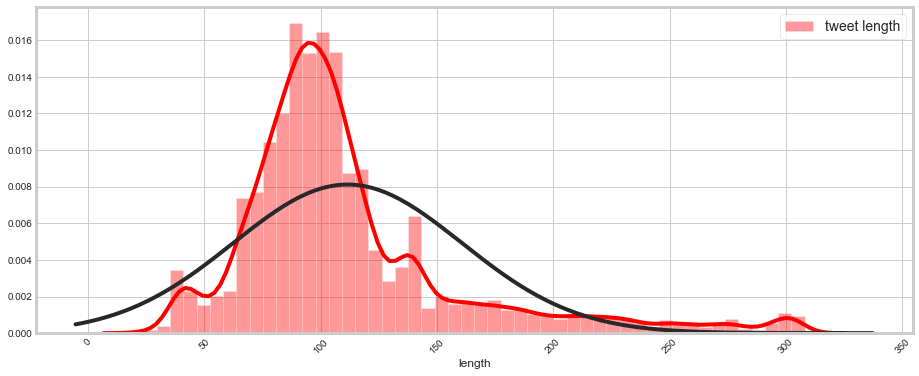

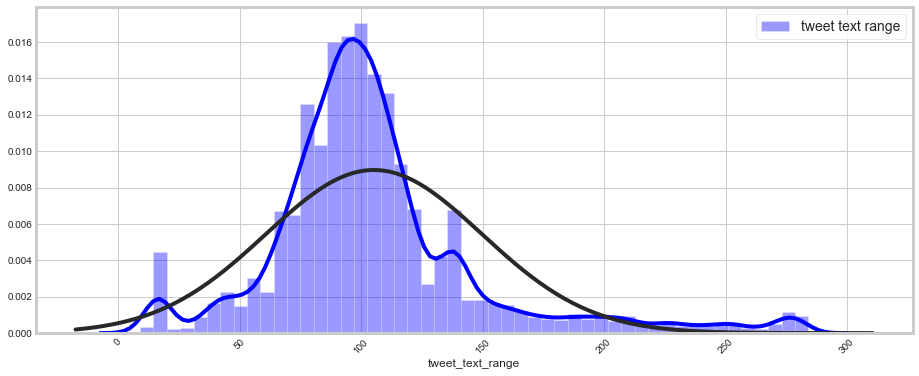

In [36]:
analysis_utils.dist_plot(tweet_data.length, 'tweet length', 'red')
analysis_utils.dist_plot(tweet_data.tweet_text_range, 'tweet text range', 'blue')

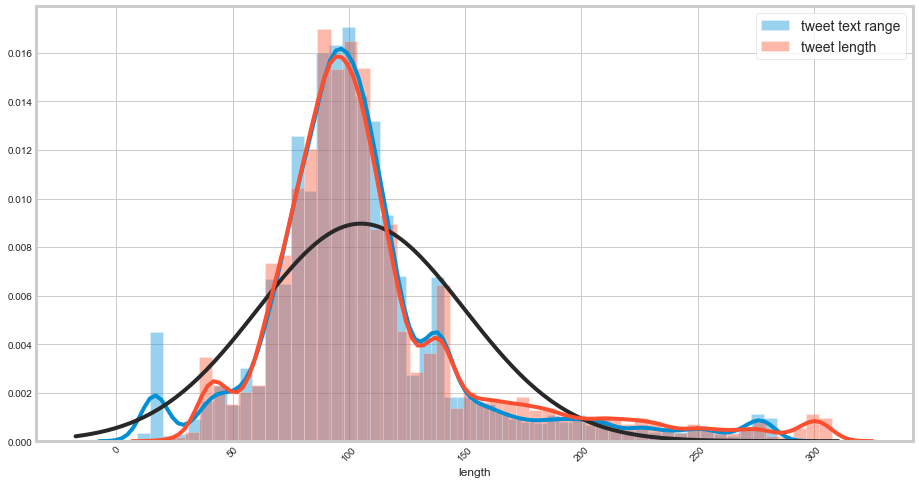

In [37]:
plt.figure(figsize=(14,8))
sns.distplot(tweet_data["tweet_text_range"], label='tweet text range', fit=norm)
sns.distplot(tweet_data["length"], label='tweet length')
plt.xticks(rotation=45)
plt.legend(fontsize='14')

### 2.Create tweet hour columns

In [38]:
tweet_data['tweet_hour'] = tweet_data['tweet_created_at'].apply(lambda x: x.strftime('%H'))

In [39]:
tweet_data['tweet_hour'] = pd.to_numeric(tweet_data['tweet_hour'])

### 3.Create tweet days columns

In [40]:
tweet_data['days'] = tweet_data['tweet_created_at'].dt.weekday_name

### 4.Create tweet date columns

In [41]:
tweet_data['date'] = pd.to_datetime(tweet_data['tweet_created_at'].dt.date)
#tweet_data.set_index('date', inplace=True)

In [43]:
tweet_data.head(2)

,tweet_id,tweet_text,tweet_text_range,tweet_created_at,tweet_favourite_count,tweet_retweets_count,tweet_hashtags,lang,source_device,length,tweet_hour,days,date
0,1266450750022070272,Latest update of the #Coronavirus in #Libya. 1...,71,2020-05-29 19:26:02,7,0,Coronavirus Libya,en,Twitter Web App,95,19,Friday,2020-05-29
1,1266445040999596034,Libyan army forces take control of Alkazerma a...,200,2020-05-29 19:03:21,42,5,Tripoli,en,Twitter Web App,224,19,Friday,2020-05-29


# 4-Descriptive analysis

Here is some descriptive anaylsis to know your data more and make sense of it

## Distribution of Retweet and Favorite Counts

In [45]:
pd.set_option('display.max_columns', None, 'display.max_colwidth', 150)

### Top 15 retweeted of tweets

In [46]:
tweet_data.sort_values('tweet_retweets_count', ascending= False)[['tweet_text', 'tweet_retweets_count']].iloc[0:15]

,tweet_text,tweet_retweets_count
178,RT @Lyobserver: A Wagner mercenary fighting for warlord Haftar was killed by Libyan government forces in Khallah frontline in southern #Tri…,326
181,A Wagner mercenary fighting for warlord Haftar was killed by Libyan government forces in Khallah frontline in southern #Tripoli on Friday. #Russia...,326
155,The Wagner mercenary killed by #Libya army forces in south #Tripoli on Friday has been identified by some Twitter accounts as “Aleksa Duric”. Pro-...,148
141,RT @Lyobserver: The Wagner mercenary killed by #Libya army forces in south #Tripoli on Friday has been identified by some Twitter accounts…,148
889,"In May 2019, warlord Haftar said that #Ramadan is the month of #Jihad and rejected any cessation of hostilities until he “liberates” #Tripoli. In ...",103
872,"RT @Lyobserver: In May 2019, warlord Haftar said that #Ramadan is the month of #Jihad and rejected any cessation of hostilities until he “l…",103
429,Hemedti agrees to send another 1200 Sudanese fighters to #Libya after UAE threats to cut off financial aid https://t.co/xy40IhqTkO,96
422,RT @Lyobserver: Hemedti agrees to send another 1200 Sudanese fighters to #Libya after UAE threats to cut off financial aid https://t.co/xy…,96
1169,RT @Lyobserver: Claiming his war in #Tripoli is against militias and terrorist groups; see how warlord Haftar’s indiscriminate rockets are…,93
1179,Claiming his war in #Tripoli is against militias and terrorist groups; see how warlord Haftar’s indiscriminate rockets are pouring down on innocen...,93


### Top 15 favourited tweets

In [47]:
tweet_data.sort_values('tweet_favourite_count', ascending= False)[['tweet_text', 'tweet_favourite_count']].iloc[0:15]

,tweet_text,tweet_favourite_count
181,A Wagner mercenary fighting for warlord Haftar was killed by Libyan government forces in Khallah frontline in southern #Tripoli on Friday. #Russia...,935
155,The Wagner mercenary killed by #Libya army forces in south #Tripoli on Friday has been identified by some Twitter accounts as “Aleksa Duric”. Pro-...,341
1449,#Turkey sends medical aid to #Libya to fight #coronavirus https://t.co/CsNfi7cbn6,261
157,#Libya's Grand Mufti Sheikh Sadiq Al-Gharyani urges the Ministry of Economy and traders to import all goods from #Turkey for standing with the Lib...,257
889,"In May 2019, warlord Haftar said that #Ramadan is the month of #Jihad and rejected any cessation of hostilities until he “liberates” #Tripoli. In ...",236
1179,Claiming his war in #Tripoli is against militias and terrorist groups; see how warlord Haftar’s indiscriminate rockets are pouring down on innocen...,207
2906,It’s a big day in Zawiya city as thousands of people celebrate the 9th anniversary of the February 17 revolution https://t.co/6TFvVsO30k,190
429,Hemedti agrees to send another 1200 Sudanese fighters to #Libya after UAE threats to cut off financial aid https://t.co/xy40IhqTkO,174
245,"Grand Mufti Sheikh Sadiq Al-Gharyani thanks #Turkey and #Qatar for standing with #Libya during its crisis, saying the deal inked with Turkey has p...",170
326,"Shocked by Watiya airbase loss, member of Tobruk-based House of Representatives, Saied Emghaib, a staunch supporter of warlord Haftar, demands a D...",166


### Most favourited tweet

In [48]:
tweet_data.sort_values('tweet_favourite_count', ascending= False)['tweet_text'].iloc[0]

'A Wagner mercenary fighting for warlord Haftar was killed by Libyan government forces in Khallah frontline in southern #Tripoli on Friday. #Russia #Libya https://t.co/GqBuAU1bIA'

### Most retweeted tweet

In [49]:
tweet_data.sort_values('tweet_retweets_count', ascending= False)['tweet_text'].iloc[0]

'RT @Lyobserver: A Wagner mercenary fighting for warlord Haftar was killed by Libyan government forces in Khallah frontline in southern #Tri…'

### The graph shows OUTLIER of retweet which clearly indicate upnormal trends on favorite behaviour

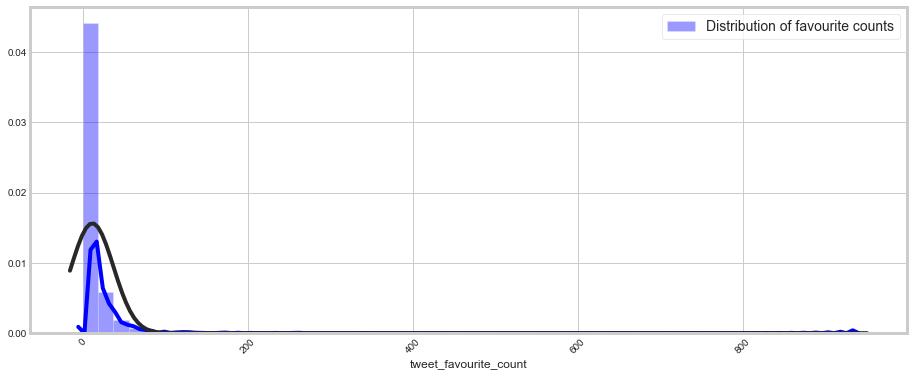

In [50]:
analysis_utils.dist_plot(tweet_data['tweet_favourite_count'], 'Distribution of favourite counts', 'blue')

### The same outlier of the retweet counts

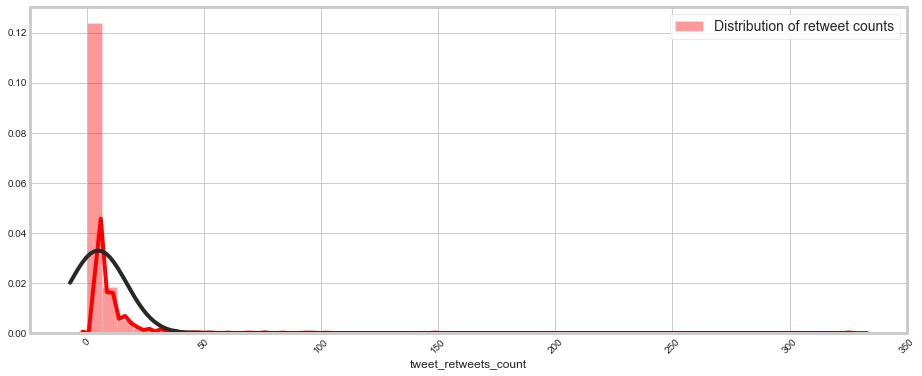

In [51]:
analysis_utils.dist_plot(tweet_data.tweet_retweets_count, 'Distribution of retweet counts', 'red')

## Explore columns outlier

### tweet_favourite_count & tweet_retweets_count columns has outlier, lets check them out

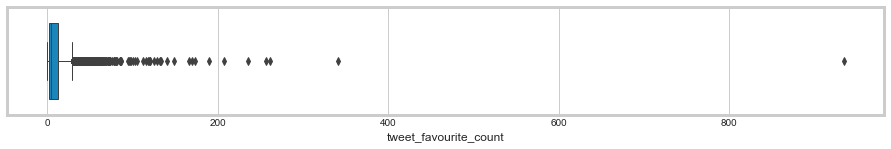

In [52]:
plt.figure(figsize=(14,2))
sns.boxplot(tweet_data.tweet_favourite_count, width=0.7, linewidth=1)

Tukeys method number of outliers is 311
90% confidence interval has 49 values between 11.0 and 13.0


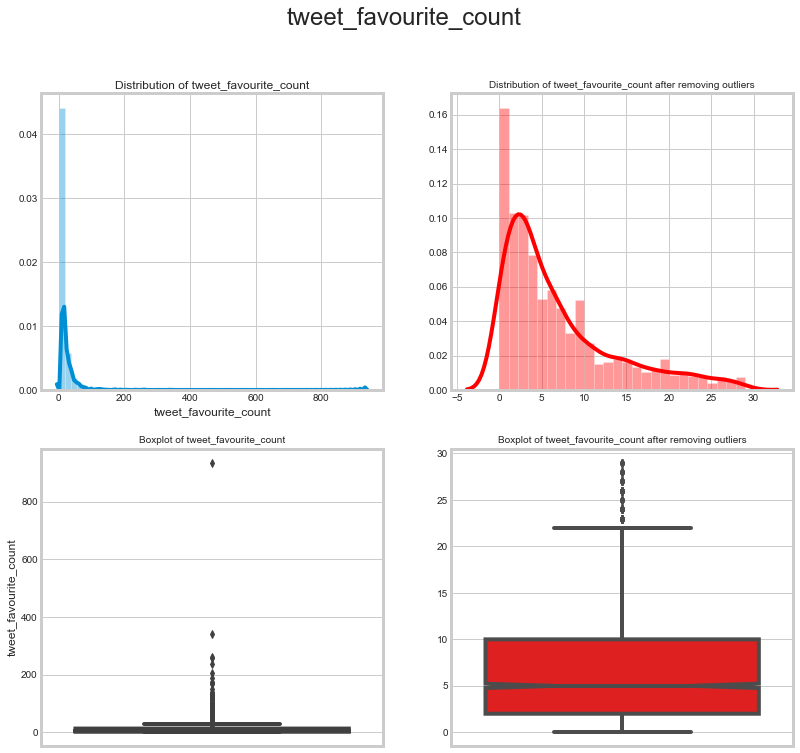

In [53]:
analysis_utils.no_outlier('tweet_favourite_count',tweet_data)

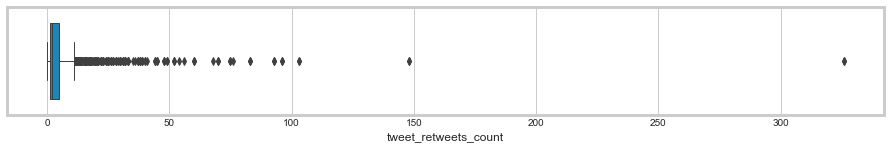

In [54]:
plt.figure(figsize=(14,2))
sns.boxplot(tweet_data.tweet_retweets_count, width=0.7, linewidth=1)

Tukeys method number of outliers is 337
90% confidence interval has 162 values between 4.0 and 5.0


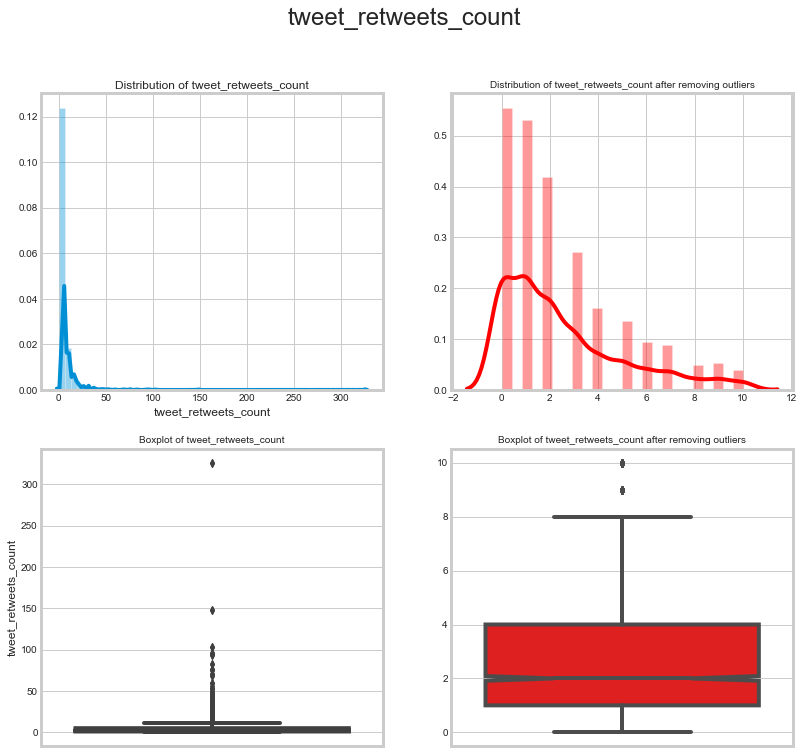

In [55]:
analysis_utils.no_outlier('tweet_retweets_count',tweet_data)

## Distribution of tweet by hour

### The boxplot clearly shows a normal behaviour of tweeting hour

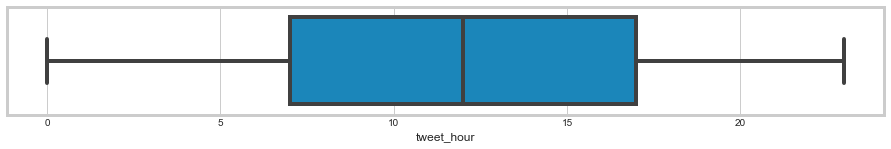

In [56]:
plt.figure(figsize=(14,2))
sns.boxplot(x=tweet_data["tweet_hour"], data=tweet_data)

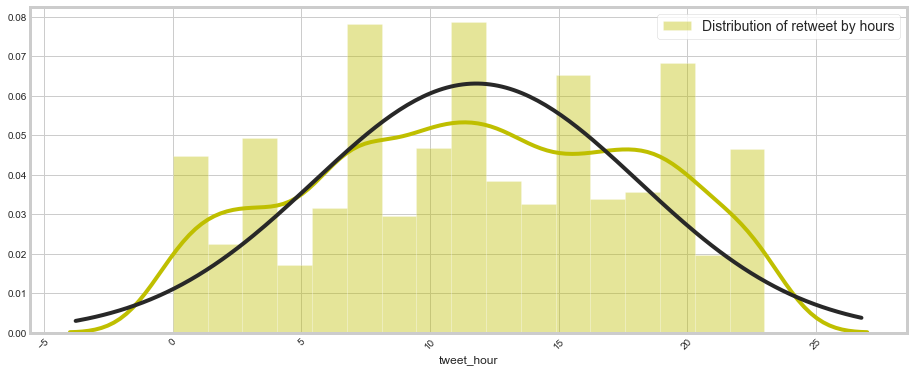

In [57]:
#plt.figure(figsize=(14,5))
#sns.distplot(tweet_data['tweet_hour'], color='blue')
analysis_utils.dist_plot(tweet_data['tweet_hour'], 'Distribution of retweet by hours', 'y')

## Distribution of tweet by days 

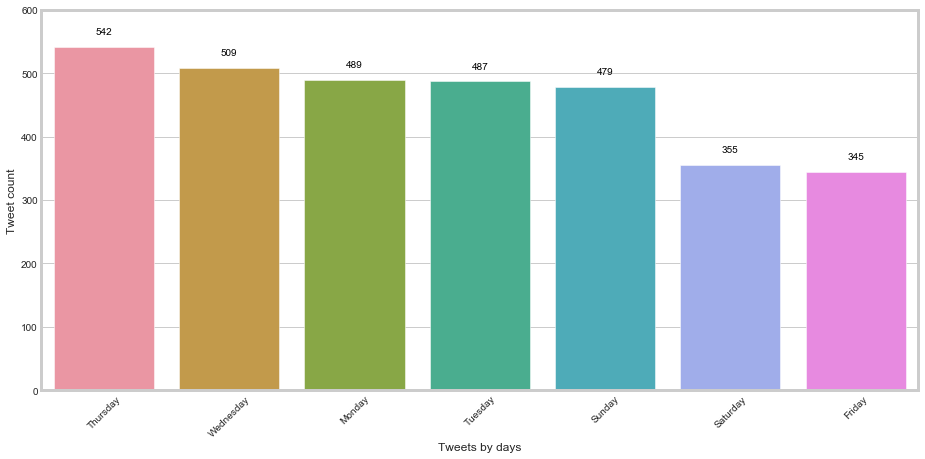

In [58]:
plt.figure(figsize=(14,7))
tweet_days = tweet_data.groupby('days').count()['tweet_id'].reset_index(name='counts')
tweet_days.sort_values(by=['counts'], ascending=False, inplace=True)
ax = sns.barplot(x=tweet_days['days'], y=tweet_days['counts'])
ax.set_ylim(0,600)
for i, v in tweet_days.reset_index().iterrows():
    ax.text(i, v.counts + 20 , v.counts, color='black', ha="center")
ax.set(xlabel='Tweets by days', ylabel='Tweet count')    
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tweet_data.groupby(['source_device', 'tweet_hour','days'])[['tweet_hour']].count()[['tweet_hour']].plot(figsize=(15,7))

## Distribution of tweet by language used

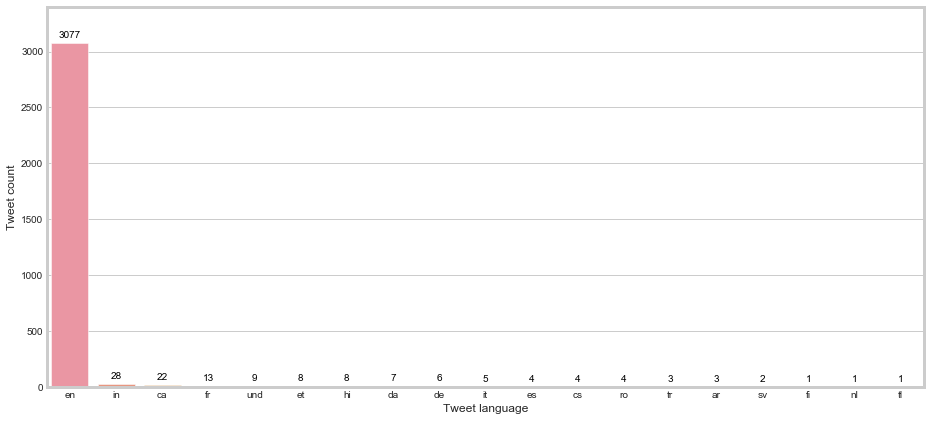

In [59]:
plt.figure(figsize=(14,7))
tweet_lang = tweet_data.groupby(['lang']).size().reset_index(name='counts')
tweet_lang.sort_values(by=['counts'], ascending=False, inplace=True)
ax = sns.barplot(x=tweet_lang['lang'], y=tweet_lang['counts'])
ax.set_ylim(0,3400)
for i, v in tweet_lang.reset_index().iterrows():
    ax.text(i, v.counts + 50 , v.counts, color='black', ha="center")
ax.set(xlabel='Tweet language', ylabel='Tweet count')
plt.show()

## Distribution of tweet by source device 

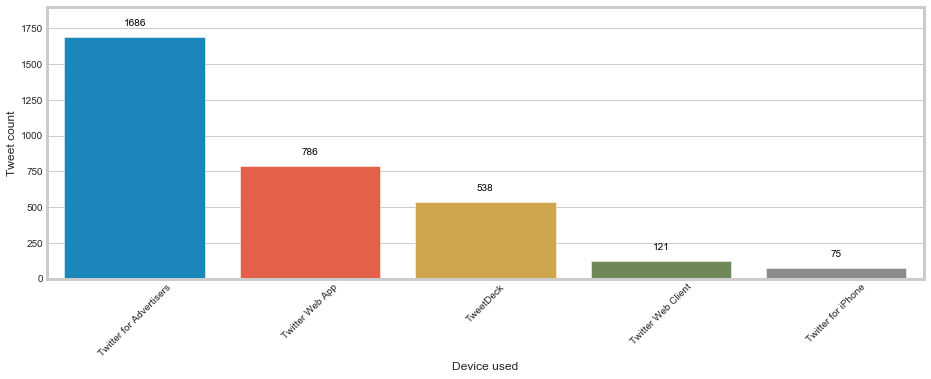

In [60]:
plt.figure(figsize=(14,5))
tweet_source_device = tweet_data.groupby(['source_device']).size().reset_index(name='counts')
tweet_source_device.sort_values(by=['counts'], ascending=False, inplace=True)
ax = sns.barplot(x=tweet_source_device['source_device'], y=tweet_source_device['counts'])
ax.set_ylim(0,1900)
for i, v in tweet_source_device.reset_index().iterrows():
    ax.text(i, v.counts + 80 , v.counts, color='black', ha="center")
ax.set(xlabel='Device used', ylabel='Tweet count')    
plt.xticks(rotation=45)
plt.show()

## Distribution of tweet by length

Text(0.5, 0, 'Length')

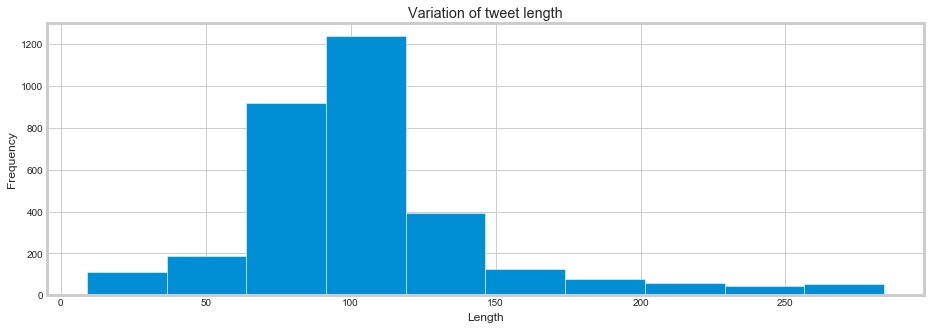

In [61]:
tweet_data.groupby('tweet_id').mean()['tweet_text_range'].plot.hist(figsize = (14, 5))
plt.title('Variation of tweet length')
plt.xlabel('Length')

# 5. Textual data cleaning followed by exploratinary data analysis

The following code is to show the the first five **tweet text**, one can observe that the text is not clean and need preprocessing in order to apply the data mining algorithms

In [62]:
textual_data = tweet_data[['tweet_text','tweet_hashtags','length','tweet_hour','days','date']]
textual_data

,tweet_text,tweet_hashtags,length,tweet_hour,days,date
0,Latest update of the #Coronavirus in #Libya. 13 new cases in Sabha city https://t.co/axlqf7Rrnw,Coronavirus Libya,95,19,Friday,2020-05-29
1,"Libyan army forces take control of Alkazerma area in south #Tripoli and prepare for the liberation battle of Qaser Bin Ghashir district, the last ...",Tripoli,224,19,Friday,2020-05-29
2,"Bir bin Daqiesh is located in Al-Hamada Al-Hamra, southwestern Libya. It is a popular destination for camping and tourist trips. https://t.co/HfQV...",,152,17,Friday,2020-05-29
3,"Exchange Rates. Friday, May 29, 2020 https://t.co/vAbagUmf3t",,60,17,Friday,2020-05-29
4,Bir bin Daqiesh https://t.co/yc8TWZAO9B,,39,15,Friday,2020-05-29
...,...,...,...,...,...,...
3201,"Libya's 17 February Revolutionaries Assembly rejects holding economic dialogue in ""biased #Egypt"" https://t.co/JBG1MO75EB",Egypt,121,6,Thursday,2020-02-06
3202,NOC renews call for ending closure of oil facilities https://t.co/u1E7r8mwpt,,76,3,Thursday,2020-02-06
3203,Spanish ship crew scanned for coronavirus as they dock in Khums port https://t.co/3p0audrf17,,92,1,Thursday,2020-02-06
3204,Opposition bloc in Jordanian Parliament demands government to clarify position on Libyan crisis https://t.co/5FPY3wyho0,,119,0,Thursday,2020-02-06


## Apply a first round of text cleaning

    1- Make text lowercase
    2- remove text in square brackets
    3- remove all form of URLs
    4- remove punctuation
    5- remove words containing numbers.
    
Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>\|+_-[]?}. Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.



In [63]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [64]:
textual_data.loc[:, 'tweet_text'] = textual_data['tweet_text'].apply(round1)
textual_data

C:\Users\manso\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,tweet_text,tweet_hashtags,length,tweet_hour,days,date
0,latest update of the coronavirus in libya new cases in sabha city,Coronavirus Libya,95,19,Friday,2020-05-29
1,libyan army forces take control of alkazerma area in south tripoli and prepare for the liberation battle of qaser bin ghashir district the last st...,Tripoli,224,19,Friday,2020-05-29
2,bir bin daqiesh is located in alhamada alhamra southwestern libya it is a popular destination for camping and tourist trips,,152,17,Friday,2020-05-29
3,exchange rates friday may,,60,17,Friday,2020-05-29
4,bir bin daqiesh,,39,15,Friday,2020-05-29
...,...,...,...,...,...,...
3201,libyas february revolutionaries assembly rejects holding economic dialogue in biased egypt,Egypt,121,6,Thursday,2020-02-06
3202,noc renews call for ending closure of oil facilities,,76,3,Thursday,2020-02-06
3203,spanish ship crew scanned for coronavirus as they dock in khums port,,92,1,Thursday,2020-02-06
3204,opposition bloc in jordanian parliament demands government to clarify position on libyan crisis,,119,0,Thursday,2020-02-06


In [ ]:
# data_clean = pd.DataFrame(data=[tweet_data.tweet_text.apply(round1), tweet_data.tweet_hashtags.apply(round1)]).transpose()
# data_clean

In [65]:
print (tweet_data[1:3].iat[0,1],'\n')
print (textual_data[1:3].iat[0,0])

Libyan army forces take control of Alkazerma area in south #Tripoli and prepare for the liberation battle of Qaser Bin Ghashir district, the last stronghold of warlord Haftar’s armed groups in Tripoli https://t.co/bW1e8CZsHK 

libyan army forces take control of alkazerma area in south tripoli and prepare for the liberation battle of qaser bin ghashir district the last stronghold of warlord haftar’s armed groups in tripoli 


## Apply a second round of cleaning

    1-Get rid of some additional punctuation
    2-non-sensical text that was missed the first time around.

In [66]:
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [67]:
textual_data.loc[:, 'tweet_text'] = textual_data['tweet_text'].apply(round2)
textual_data.head()

,tweet_text,tweet_hashtags,length,tweet_hour,days,date
0,latest update of the coronavirus in libya new cases in sabha city,Coronavirus Libya,95,19,Friday,2020-05-29
1,libyan army forces take control of alkazerma area in south tripoli and prepare for the liberation battle of qaser bin ghashir district the last st...,Tripoli,224,19,Friday,2020-05-29
2,bir bin daqiesh is located in alhamada alhamra southwestern libya it is a popular destination for camping and tourist trips,,152,17,Friday,2020-05-29
3,exchange rates friday may,,60,17,Friday,2020-05-29
4,bir bin daqiesh,,39,15,Friday,2020-05-29


### Check the clean tweets

In [68]:
print (tweet_data[1:3].iat[0,1],'\n')
print (textual_data[1:3].iat[0,0])

Libyan army forces take control of Alkazerma area in south #Tripoli and prepare for the liberation battle of Qaser Bin Ghashir district, the last stronghold of warlord Haftar’s armed groups in Tripoli https://t.co/bW1e8CZsHK 

libyan army forces take control of alkazerma area in south tripoli and prepare for the liberation battle of qaser bin ghashir district the last stronghold of warlord haftars armed groups in tripoli 


## Apply words stemming
Stemming algorithm is very useful in the field of text mining and helps to gain relevant information as it reduces all words with the same roots to a common form by removing suffixes such as -action, ing, -es and -ses. However, there can be problematic where there are spelling errors.

This step is extremely useful for pre-processing textual data but it also depends on your goal. Here our goal is to calculate sentiment scores and if you look closely to the above code words like ‘inexpensive’ and ‘thrilled’ became ‘inexpens’ and ‘thrill’ after applying this technique. This will help us in text classification to deal with the curse of dimensionality but to calculate the sentiment score this process is not useful.

    allow	allowance	allowed	allowing	allows
    algeria	algerian
    
    went go


In [70]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, ISRIStemmer, RegexpStemmer, WordNetLemmatizer

p_st = PorterStemmer()
l_st = LancasterStemmer()
s_st = SnowballStemmer(language='english')

textual_data['tweet_text'] = textual_data.tweet_text.apply(lambda x: " ".join([p_st.stem(word) for word in x.split()]))

C:\Users\manso\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Apply words Lemmatization

### Check the stemmed tweets

In [71]:
print (tweet_data[1:3].iat[0,1],'\n')
print (textual_data[1:3].iat[0,0])

Libyan army forces take control of Alkazerma area in south #Tripoli and prepare for the liberation battle of Qaser Bin Ghashir district, the last stronghold of warlord Haftar’s armed groups in Tripoli https://t.co/bW1e8CZsHK 

libyan armi forc take control of alkazerma area in south tripoli and prepar for the liber battl of qaser bin ghashir district the last stronghold of warlord haftar arm group in tripoli


## Remove the stop words and then tokenize all tweets

Stop-words being most commonly used in English language; however, these words have no predictive power in reality. Words such as I, me, myself, he, she, they, our, mine, you, yours etc.

### Import the nessessery library for NLP

In [72]:
# Natural Language Processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report

In [76]:
tweet = textual_data.tweet_text.str.cat(sep=' ')
tokens = word_tokenize(tweet)
stop_words = set(nltk.corpus.stopwords.words('english'))

tokens = [w for w in tokens if not w in stop_words and w.isalpha()] # with duplicate words
vocabulary = set(tokens) # without duplicate words

### Same for hastags

In [79]:
hashtag = textual_data.tweet_hashtags.str.cat(sep=' ')
hashtag = hashtag.lower()
hash_tokens = word_tokenize(hashtag)

hash_tokens = [w for w in hash_tokens if not w in stop_words and w.isalpha()] # with duplicate words
hash_vocabulary = set(hash_tokens) # without duplicate words
#hash_vocabulary

110

## Spelling Correction


In [80]:
# b = TextBlob("I havv goood speling!")
# print(b.correct())
# I have good spelling!

# Exploratory Data Analysis

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.


1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words

## Most Common Words

In [81]:
textual_data.head()

,tweet_text,tweet_hashtags,length,tweet_hour,days,date
0,latest updat of the coronaviru in libya new case in sabha citi,Coronavirus Libya,95,19,Friday,2020-05-29
1,libyan armi forc take control of alkazerma area in south tripoli and prepar for the liber battl of qaser bin ghashir district the last stronghold ...,Tripoli,224,19,Friday,2020-05-29
2,bir bin daqiesh is locat in alhamada alhamra southwestern libya it is a popular destin for camp and tourist trip,,152,17,Friday,2020-05-29
3,exchang rate friday may,,60,17,Friday,2020-05-29
4,bir bin daqiesh,,39,15,Friday,2020-05-29


### Count most common words 

#### We can see some words need to be be added to the stop list

In [82]:
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
frequency_dist

FreqDist({'libya': 1051, 'haftar': 753, 'tripoli': 614, 'libyan': 480, 'coronaviru': 349, 'forc': 300, 'warlord': 271, 'group': 244, 'attack': 224, 'ministri': 213, ...})

In [83]:
#stop_words

In [84]:
#frequency_dist.keys()

In [85]:
#frequency_dist.values()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

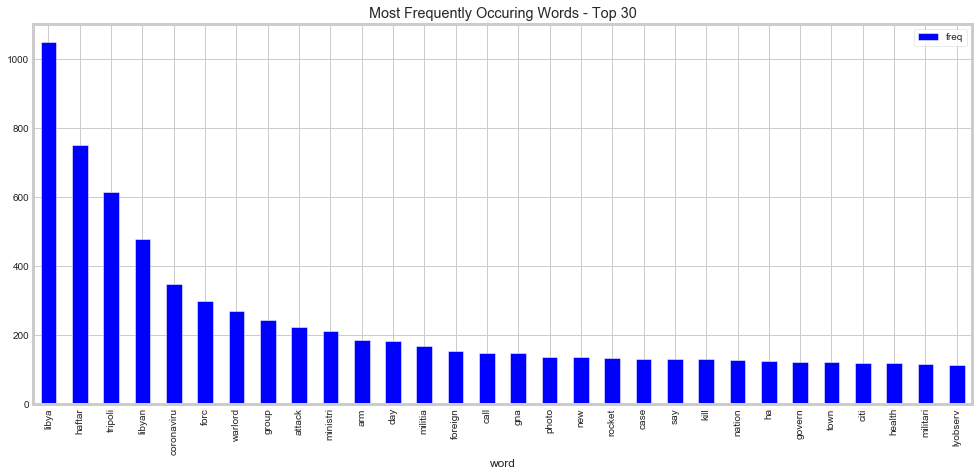

In [86]:
frequency = pd.DataFrame(frequency_dist.items(), columns=['word','freq'])
frequency = frequency.sort_values(by=['freq'], ascending=False)

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [87]:
frequency.head(50)

,word,freq
3,libya,1051
27,haftar,753
16,tripoli,614
8,libyan,480
2,coronaviru,349
10,forc,300
26,warlord,271
29,group,244
188,attack,224
67,ministri,213


In [88]:
stop_words.update(['libya','libyan','day','new','photo','lyobserver','town','calls','due','says'])

tokens = [w for w in tokens if not w in stop_words and w.isalpha()]
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
frequency_dist

FreqDist({'haftar': 753, 'tripoli': 614, 'coronaviru': 349, 'forc': 300, 'warlord': 271, 'group': 244, 'attack': 224, 'ministri': 213, 'arm': 185, 'militia': 169, ...})

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

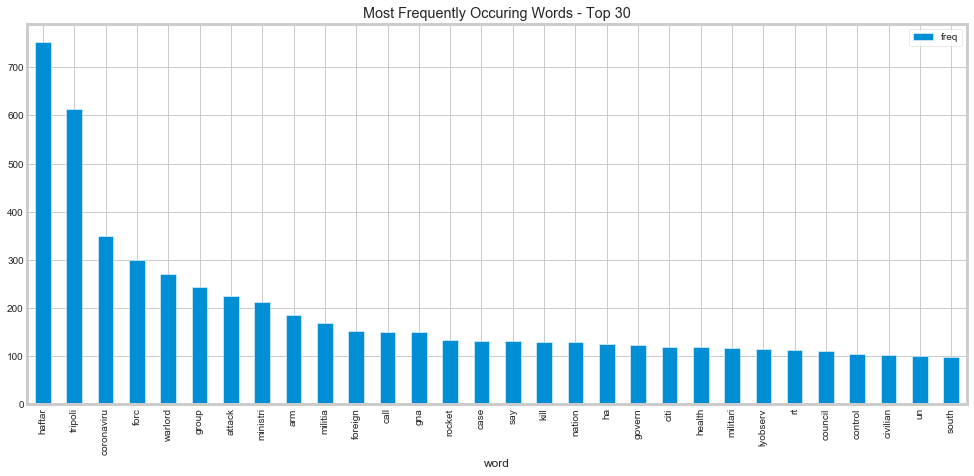

In [89]:
frequency = pd.DataFrame(frequency_dist.items(), columns=['word','freq'])
frequency = frequency.sort_values(by=['freq'], ascending=False)

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Most Frequently Occuring Words - Top 30")

## Create word cloud for most common words in all tweets

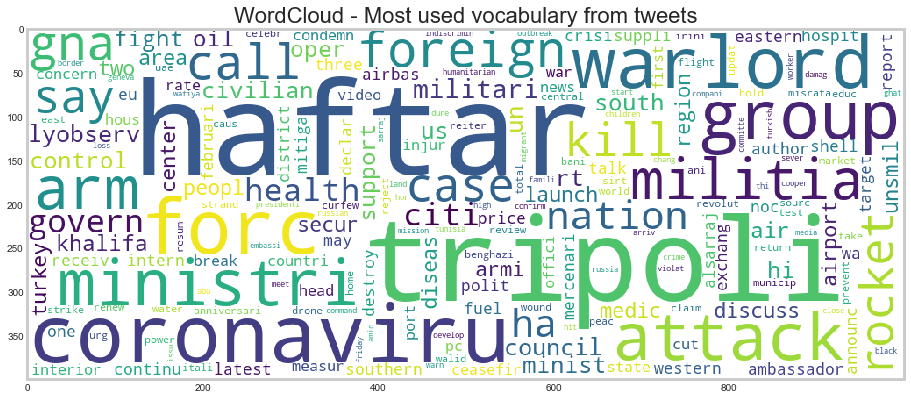

In [90]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 400).generate_from_frequencies(frequency_dist)
#wordcloud = WordCloud(font_path='C:/Windows/Fonts/majallab.ttf',
#   background_color = 'white', width = 1000, height = 400).generate_from_frequencies(frequency_dist)

plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.grid(False)
plt.title("WordCloud - Most used vocabulary from tweets", fontsize = 22)
plt.show()

## Ngram Range = (1,1)
Using Count Vectorizer explore the most used words and combinations of words

In [93]:
CountVectorizerNgram = CountVectorizer(stop_words = 'english', ngram_range=(2,2))
ngram_result = CountVectorizerNgram.fit_transform(textual_data.tweet_text)

data_ngram1 = pd.DataFrame(ngram_result.toarray(),columns=CountVectorizerNgram.get_feature_names())
data_ngram1.shape

(3206, 11228)

In [ ]:
#data_ngram1

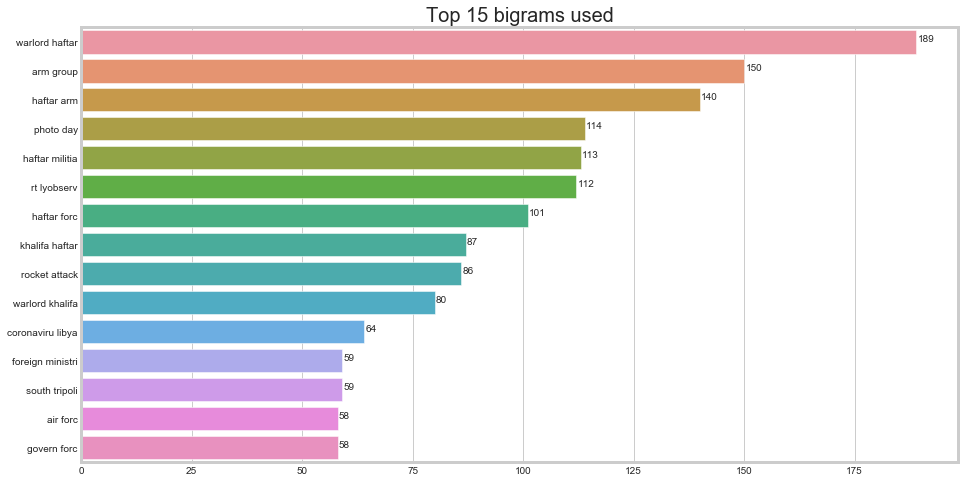

In [94]:
top15 = data_ngram1.sum(axis = 0).sort_values(ascending=False).head(15)
analysis_utils.bar_plot(top15.values, top15.index, 'Top 15 bigrams used')

## Ngram Range = (2,2)

In [95]:
CountVectorizerNgram = CountVectorizer(stop_words = 'english', ngram_range=(3,3))
ngram_result = CountVectorizerNgram.fit_transform(textual_data.tweet_text)

data_ngram2 = pd.DataFrame(ngram_result.toarray(),columns=CountVectorizerNgram.get_feature_names())
data_ngram2.shape

(3206, 12901)

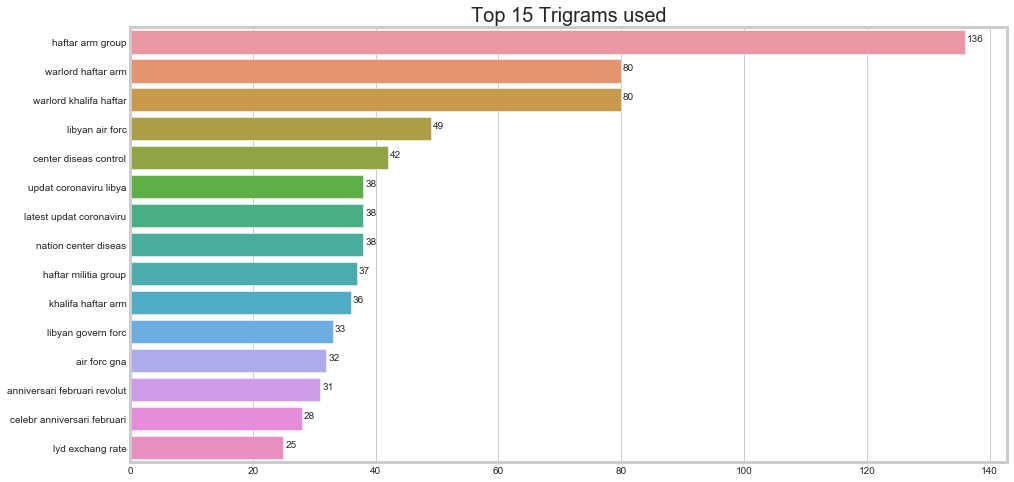

In [96]:
top15 = data_ngram2.sum(axis = 0).sort_values(ascending=False).head(15)
analysis_utils.bar_plot(top15.values, top15.index, 'Top 15 Trigrams used')

## Create custom stop_words list to include common frequent words, since they occur frequently in all labels


In [ ]:
# custom = stop_words
# custom = list(custom)
# common_unigrams = list(common_unigrams)
# common_bigrams = list(common_bigrams)

# # Append unigrams to list 
# for i in common_unigrams:
#     custom.append(i)
    
# # Append bigrams to list 
# for i in common_bigrams:
#     split_words = i.split(" ")
#     for word in split_words:
#         custom.append(word)

## Hashtag analysis

In [97]:
frequency_dist_hash = nltk.FreqDist(hash_tokens)
sorted(frequency_dist_hash,key=frequency_dist.__getitem__, reverse=True)[0:50]
frequency_dist_hash

FreqDist({'libya': 905, 'tripoli': 278, 'coronavirus': 253, 'turkey': 42, 'italy': 30, 'russia': 26, 'tunisia': 24, 'uae': 22, 'un': 19, 'malta': 18, ...})

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

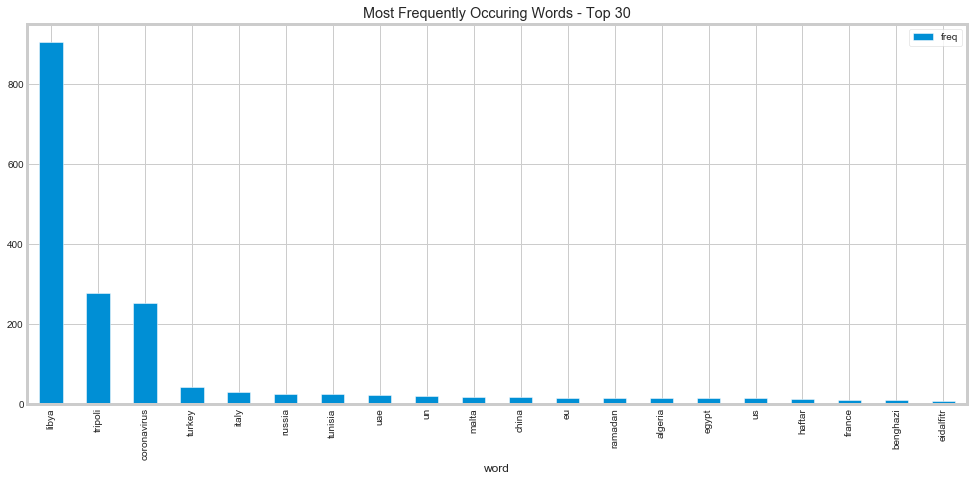

In [98]:
frequency = pd.DataFrame(frequency_dist_hash.items(), columns=['word','freq'])
frequency = frequency.sort_values(by=['freq'], ascending=False)

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Most Frequently Occuring Words - Top 30")

## Create word cloud for most common words in Hashtags

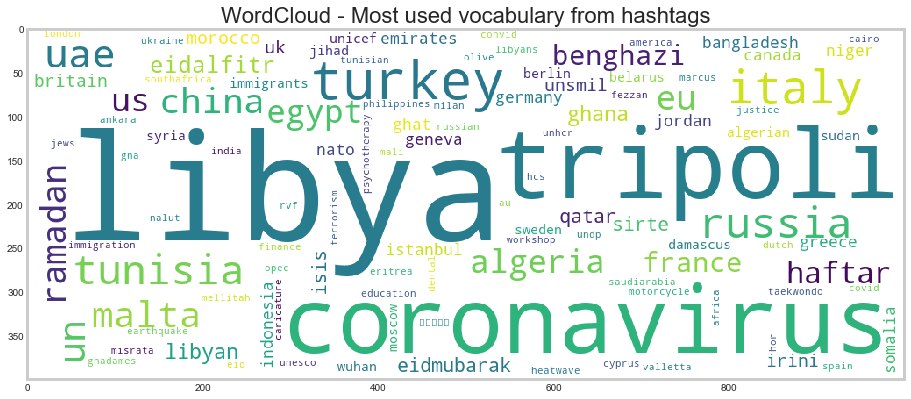

In [99]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 400).generate_from_frequencies(frequency_dist_hash)

plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.grid(False)
plt.title("WordCloud - Most used vocabulary from hashtags", fontsize = 22)
plt.show()

## Create Documents term matrix (bag of words) for later use

###  Hashtag DTM

In [100]:
dtm_vectorizer = CountVectorizer(stop_words = 'english')
dtm_result = dtm_vectorizer.fit_transform(textual_data.tweet_hashtags)

dtm_hashtags = pd.DataFrame(dtm_result.toarray(),columns=dtm_vectorizer.get_feature_names())
dtm_hashtags.head()

,africa,algeria,algerian,america,ankara,au,bangladesh,belarus,benghazi,berlin,britain,cairo,canada,caricature,china,convid,coronavirus,covid,covid19,covid_19,covidー19,cyprus,damascus,dental,dutch,earthquake,education,egypt,eid,eidalfitr,eidmubarak,emirates,eritrea,eu,fezzan,finance,france,geneva,germany,ghadames,ghana,ghat,gna,greece,haftar,hcs,heatwave,hor,immigrants,immigration,india,indonesia,irini,isis,istanbul,italy,jews,jihad,jordan,justice,libya,libya_observer_caricature,libyan,libyans,london,mali,malta,marcus,mellitah,milan,misrata,morocco,moscow,motorcycle,nalut,nato,niger,olive,opec,philippines,psychotherapy,qatar,ramadan,russia,russian,rvf,saudiarabia,sirte,somalia,southafrica,spain,sudan,sweden,syria,taekwondo,terrorism,tripoli,tunisia,tunisian,turkey,uae,uk,ukraine,undp,unesco,unhcr,unicef,unsmil,valletta,workshop,wuhan,ليبيا
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
dtm_hashtags.shape

(3206, 112)

### Tweet text DTM

In [102]:
dtm_vectorizer = CountVectorizer(stop_words = 'english')
dtm_result = dtm_vectorizer.fit_transform(textual_data.tweet_text)

dtm_tweet = pd.DataFrame(dtm_result.toarray(),columns=dtm_vectorizer.get_feature_names())
dtm_tweet.head()

ababa  ababil  abandon  abduct  abducte  abdulaziz  abduljalil  abdullah  \
0      0       0        0       0        0          0           0         0   
1      0       0        0       0        0          0           0         0   
2      0       0        0       0        0          0           0         0   
3      0       0        0       0        0          0           0         0   
4      0       0        0       0        0          0           0         0   

   abdulmonem  abdulrazzaq  abdurrahim  abela  abid  abl  ablaz  abov  abroad  \
0           0            0           0      0     0    0      0     0       0   
1           0            0           0      0     0    0      0     0       0   
2           0            0           0      0     0    0      0     0       0   
3           0            0           0      0     0    0      0     0       0   
4           0            0           0      0     0    0      0     0       0   

   abstain  absurd  abu  abus  acacu  accept  access  accid  accident  \
0        0       0    0     0      0       0       0      0         0   
1        0       0    0     0      0       0       0      0         0   
2        0       0    0     0      0       0       0      0         0   
3        0       0    0     0      0       0       0      0         0   
4        0       0    0     0      0       0       0      0         0   

   accompani  accord  account  accountsettl  accus  achiev  act  action  \
0          0       0        0             0      0       0    0       0   
1          0       0        0             0      0       0    0       0   
2          0       0        0             0      0       0    0       0   
3          0       0        0             0      0       0    0       0   
4          0       0        0             0      0       0    0       0   

   activ  activist  ad  adam  addi  addit  address  adher  adjac  administr  \
0      0         0   0     0     0      0        0      0      0          0   
1      0         0   0     0     0      0        0      0      0          0   
2      0         0   0     0     0      0        0      0      0          0   
3      0         0   0     0     0      0        0      0      0          0   
4      0         0   0     0     0      0        0      0      0          0   

   adopt  advanc  adventur  advertis  advic  advis  advisor  advisori  affair  \
0      0       0         0         0      0      0        0         0       0   
1      0       0         0         0      0      0        0         0       0   
2      0       0         0         0      0      0        0         0       0   
3      0       0         0         0      0      0        0         0       0   
4      0       0         0         0      0      0        0         0       0   

   affect  affili  affirm  africa  african  africom  afriqiyah  aftermath  \
0       0       0       0       0        0        0          0          0   
1       0       0       0       0        0        0          0          0   
2       0       0       0       0        0        0          0          0   
3       0       0       0       0        0        0          0          0   
4       0       0       0       0        0        0          0          0   

   age  agenc  agenda  agent  aggress  aggressor  agha  ago  agre  agreement  \
0    0      0       0      0        0          0     0    0     0          0   
1    0      0       0      0        0          0     0    0     0          0   
2    0      0       0      0        0          0     0    0     0          0   
3    0      0       0      0        0          0     0    0     0          0   
4    0      0       0      0        0          0     0    0     0          0   

   agricultur  ahm  aid  aim  ain  air  airbas  airbu  aircraft  airforc  \
0           0    0    0    0    0    0       0      0         0        0   
1           0    0    0    0    0    0       0      0         0        0   
2           0    

In [103]:
dtm_tweet.shape

(3206, 3029)

# 6- Sentiment Analysis of media agency tweets

Key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

In [104]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

textual_data['polarity'] = textual_data.tweet_text.astype(str).apply(pol)
textual_data['subjectivity'] = textual_data.tweet_text.astype(str).apply(sub)

textual_data.head()

C:\Users\manso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\manso\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tweet_text,tweet_hashtags,length,tweet_hour,days,date,polarity,subjectivity
0,latest updat of the coronaviru in libya new case in sabha citi,Coronavirus Libya,95,19,Friday,2020-05-29,0.318182,0.677273
1,libyan armi forc take control of alkazerma area in south tripoli and prepar for the liber battl of qaser bin ghashir district the last stronghold ...,Tripoli,224,19,Friday,2020-05-29,0.000000,0.066667
2,bir bin daqiesh is locat in alhamada alhamra southwestern libya it is a popular destin for camp and tourist trip,,152,17,Friday,2020-05-29,0.600000,0.900000
3,exchang rate friday may,,60,17,Friday,2020-05-29,0.000000,0.000000
4,bir bin daqiesh,,39,15,Friday,2020-05-29,0.000000,0.000000


In [105]:
print((textual_data.polarity >= 0).astype(int).sum(),'out of', len(textual_data.polarity))
print((textual_data.polarity <= 0).astype(int).sum(),'out of', len(textual_data.polarity))
print((textual_data.polarity == 0).astype(int).sum(),'out of', len(textual_data.polarity))

2681 out of 3206
2668 out of 3206
2143 out of 3206


In [106]:
textual_data.iloc[500:520]

,tweet_text,tweet_hashtags,length,tweet_hour,days,date,polarity,subjectivity
500,libya air forc under gna conduct drone strike on watiya airbas destroy an ammunitionladen militari vehicl,Libya,139,19,Tuesday,2020-05-12,-0.200000,0.000000
501,turkey joint quintupl statement on libya is typic hypocrisi,Turkey Libya,92,19,Tuesday,2020-05-12,0.000000,0.000000
502,libya receiv medic aid from unicef,Libya UNICEF,65,18,Tuesday,2020-05-12,0.000000,0.000000
503,a fourday spring heatwav will hit the western region of libya on wednesday may with temperatur predict to soar as high as °c in tripoli °c in ghar...,heatwave Libya,213,17,Tuesday,2020-05-12,0.080000,0.270000
504,almishri to german ambassador haftar ha no place in libya futur,Libya,95,17,Tuesday,2020-05-12,0.000000,0.000000
505,the libyankorean center in tripoli ha design homemad medic protect cloth to counter the coronaviru,Coronavirus,137,17,Tuesday,2020-05-12,-0.100000,0.100000
506,detain tunisian sailor releas from zawia,,70,17,Tuesday,2020-05-12,0.000000,0.000000
507,libyan ambassador to spain deni passeng from madrid were exempt from plan,,113,16,Tuesday,2020-05-12,0.000000,0.000000
508,pc member kajman discuss plan to resum fuel convoy to the south,,93,15,Tuesday,2020-05-12,0.000000,0.000000
509,a woman wa kill and five civilian wound in a fresh rocket attack on hadba neighbourhood in tripoli on tuesday,,139,14,Tuesday,2020-05-12,0.300000,0.500000


## Check count of the label columns

([], <a list of 0 Text xticklabel objects>)

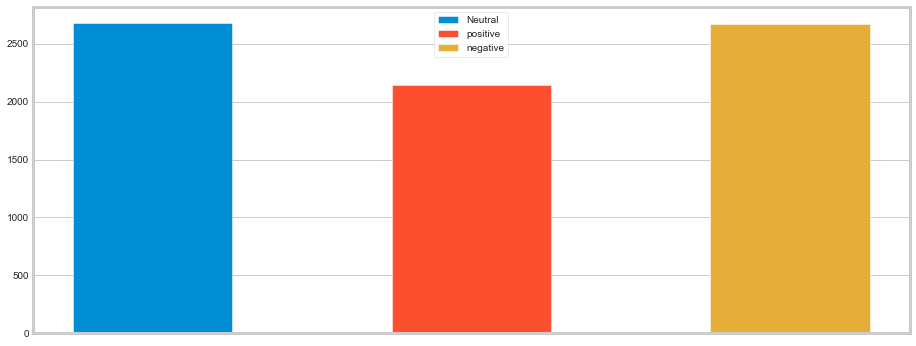

In [107]:
plt.figure(figsize=(14,6))
plt.bar(0.7, pd.Series((textual_data.polarity >= 0).sum()), width=0.5, label='Neutral')
plt.bar(1.7, pd.Series((textual_data.polarity == 0).sum()), width=0.5, label='positive')
plt.bar(2.7, pd.Series((textual_data.polarity <= 0).sum()), width=0.5, label='negative')
plt.legend()
plt.xticks([])

## The histogram of polarity of tweet

The plot clearly shows that the label need to be binarized, most tweet is stacked on netural label 

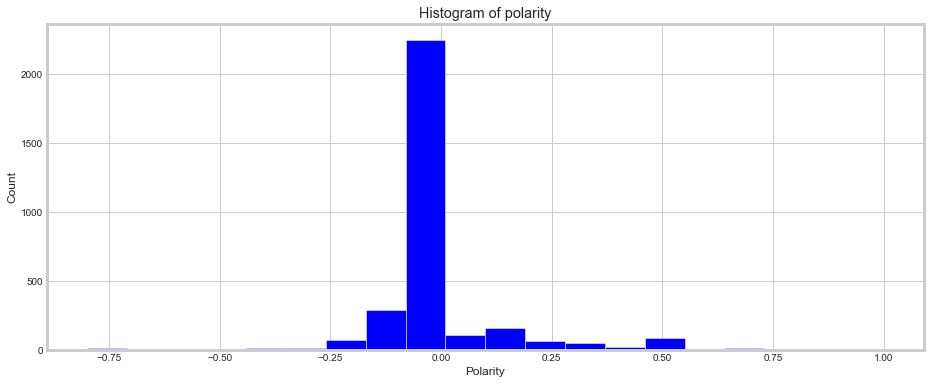

In [108]:
plt.figure(figsize=(14,6))
plt.hist(textual_data.polarity, bins=20, facecolor='blue')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

## Histogram of subjective and objective tweet

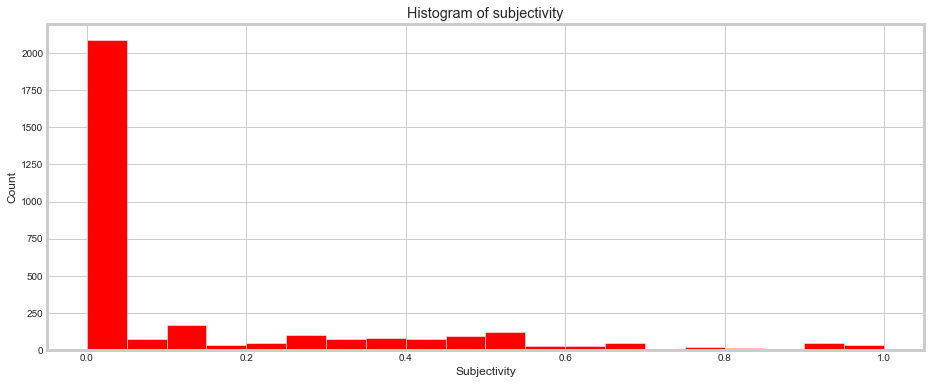

In [109]:
plt.figure(figsize=(14,6))
plt.hist(textual_data.subjectivity, bins=20, facecolor='red')
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of subjectivity')
plt.show();

### Distribution of tweets based on polarity and subjectivity

Text(0, 0.5, '<-- Facts -------- Opinions -->')

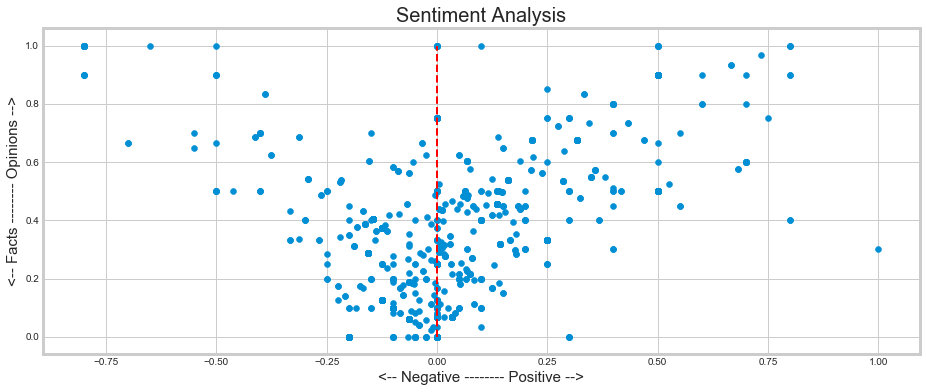

In [110]:
plt.figure(figsize=(14,6))
plt.scatter(x=textual_data.polarity, y=textual_data.subjectivity)
plt.plot( np.zeros(2), np.arange(0,2), color='red', linewidth=2, linestyle='dashed')

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

## Measure the sentiment by days

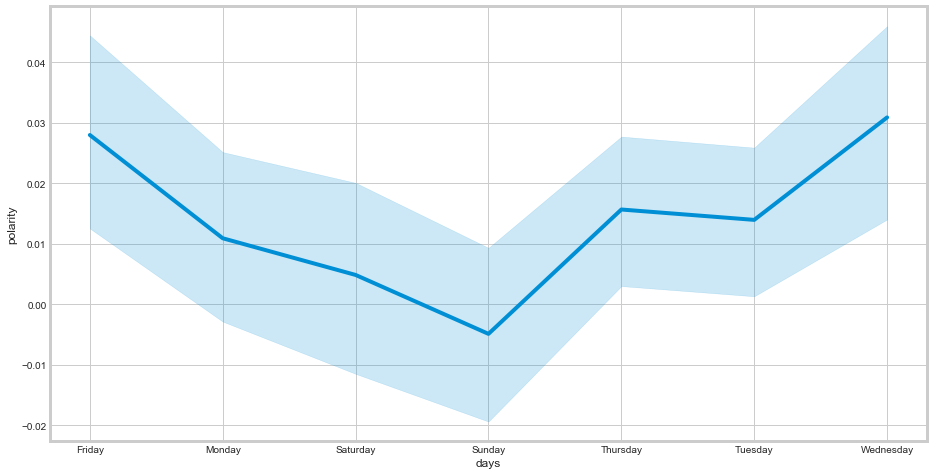

In [111]:
plt.figure(figsize=(14,8))
sns.lineplot(x='days', y='polarity', data=textual_data)
plt.show()

In [ ]:
# plt.figure(figsize=(14,8))
# sns.scatterplot(x=textual_data.polarity, y=textual_data.date, color='r', linewidth=0.1)
# sns.lineplot( np.zeros(7), np.arange(0,7), color='k', linewidth=2, linestyle='dashed')

# plt.title('Tweets sentiment against days time', fontsize=20)
# plt.show()

In [ ]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(textual_data, x_vars=['days','tweet_hour','length'], y_vars='polarity', size=6, aspect=0.7)


## How two words tighed togader?

In [112]:
tighed_word = dtm_hashtags[['libya','turkey']]
tighed_word.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [113]:
data_tighed_word = pd.concat([tighed_word.libya, tighed_word.turkey], axis=1)

data_tighed_word.columns = ['libya', 'turkey']
data_tighed_word.head()

,libya,turkey
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


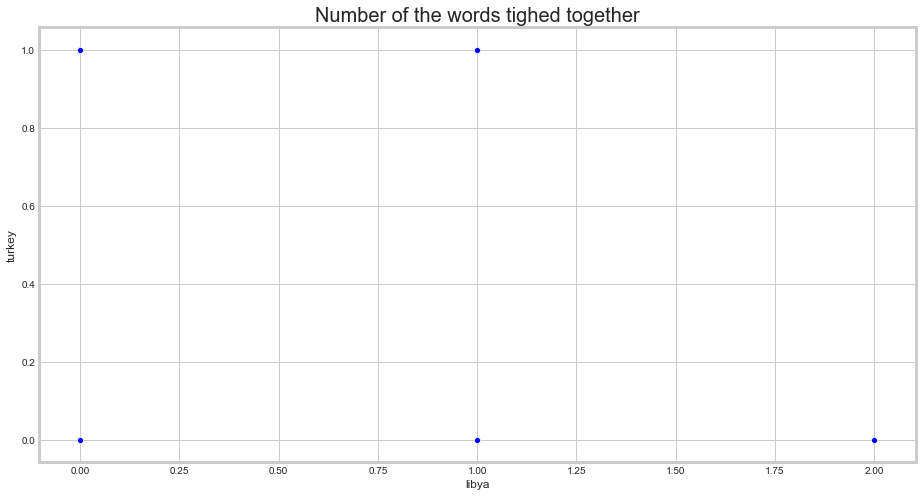

In [114]:
plt.rcParams['figure.figsize'] = [14, 8]
sns.scatterplot(data_tighed_word.libya, data_tighed_word.turkey, color='blue')
plt.title('Number of the words tighed together', fontsize=20)

plt.show()

<Figure size 1008x1008 with 0 Axes>

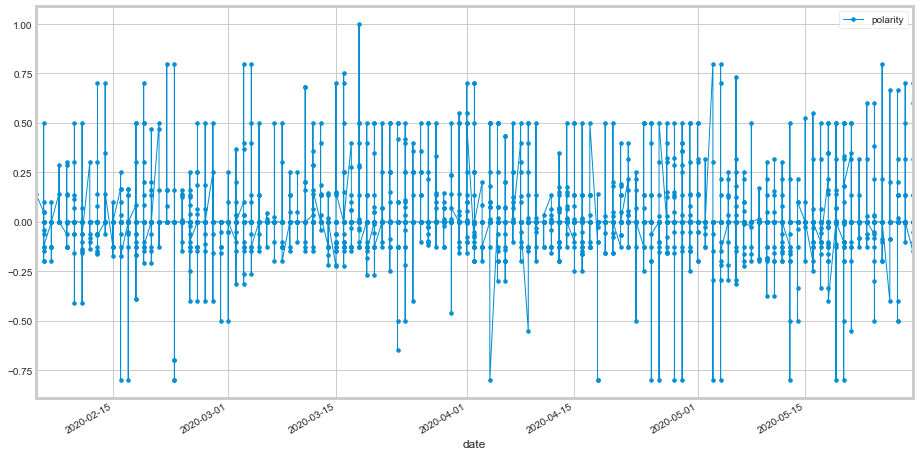

In [115]:
plt.figure(figsize=(14,14))
textual_data[['polarity','date']].set_index('date').plot(ls='-',lw=1, ms=7, marker='.')

<Figure size 1008x576 with 0 Axes>

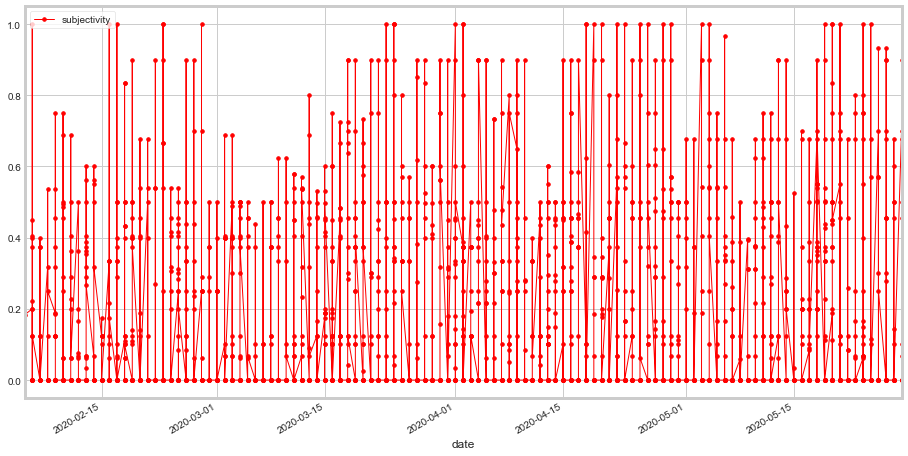

In [116]:
plt.figure(figsize=(14,8))
textual_data[['subjectivity','date']].set_index('date').plot(color='red', ls='-',lw=1, ms=7, marker='.')
#plt.xticks(np.arange(min(textual_data.date), max(textual_data.date)+1, 1.0))
#plt.xticks(textual_data.date[::3], textual_data.date[::3])


# Modeling (Tweets classification )

### Logistic regression is used to classify the tweet based on polarity



In [120]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Setting X (predictor) and y (target) variables

In [117]:
X = textual_data.tweet_text
y = textual_data.polarity

In [118]:
X.shape, y.shape

((3206,), (3206,))

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69, test_size = 0.3) # stratify=y

### Model 1:  Logistic Regression


In [122]:
pipe = Pipeline([('dtm', CountVectorizer()),
                 ('lr', LinearRegression())])

pipe_params = {'dtm__stop_words': [None, 'english'],
               'dtm__ngram_range': [(1,1), (2,2), (1,3)]} # Tune GridSearchCV

GridSearch = GridSearchCV(pipe, param_grid=pipe_params, cv=10)
GridSearch.fit(X_train, y_train)

y_pred = GridSearch.predict(X_test)

In [123]:
lr = GridSearch.best_estimator_.named_steps['lr']
print('Intercept =', lr.intercept_)
print('Slope =',lr.coef_)

Intercept = 0.010295725319101601
Slope = [ 0.00061388  0.00061388  0.00061388 ... -0.00034456 -0.00034456
 -0.00034456]


In [124]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03809565630837307
Mean Squared Error: 0.010097888475306384
Root Mean Squared Error: 0.10048825043409992


Such high accurecy indicate algorithm overfitting the training data, 
The other reason is the unbalanced labels

In [125]:
print(GridSearch.score(X_train, y_train)*100,'%')

99.99999999998057 %



### There are many factors that may have contributed to this inaccuracy, for example:

    1- Need more data: We need to have a huge amount of data to get the best possible prediction.
    2- Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
    3- Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.


# To do:

    1- lemmetazation
    2- Part-of-speech Tagging
    3- topic modeling
    4- text generation
    5- Spelling Correction using textblob
    6- Apply TfidfTransformer
    7- WordNetLemmatizer
    8- Extract Emoji patterns (emotion extraction)
    9- stratisfied sampling
    10- lexical classifer to label the tweet
    11- fine-grained-sentiment

